In [1]:
import pandas as pd

In [2]:
data = {'job_title_short' : ['Data Analyst', 'Data Scientist', 'Data Engineer'],
        'job_skills' : [['excel', 'sql', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
        }

df_skills_lists = pd.DataFrame(data)

df_skills_lists

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [3]:
df_skills_lists['job_skills'].explode()

0      excel
0        sql
0        sql
0     python
1     python
1          r
2        aws
2     python
2    airflow
Name: job_skills, dtype: object

In [4]:
data2 = {'job_title_short' : ['Data Analyst', 'Data Scientist', 'Data Engineer'],
        'job_skills' : [('excel', 'sql', 'sql', 'python'), ('python', 'r'), ['aws', 'python', 'airflow']]
        }

df_skills_lists2 = pd.DataFrame(data2)

df_skills_lists2

,job_title_short,job_skills
0,Data Analyst,"(excel, sql, sql, python)"
1,Data Scientist,"(python, r)"
2,Data Engineer,"[aws, python, airflow]"


In [5]:
df_skills_lists2.explode('job_skills')

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [6]:
# Import the libraries

import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the Dataset from HuggingFace
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_exploded = df.explode('job_skills')

df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [ ]:
# Make a copy of the exploded dataset

df_exploded_copy = df_exploded.copy()

In [9]:
df_exploded_copy[df_exploded_copy.duplicated()]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",mongodb,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
13,Senior Data Engineer,Senior Data Engineer,"New York, NY",via LinkedIn,Full-time,False,"Texas, United States",2023-11-15 13:08:52,True,True,United States,None,NaN,NaN,Nayya,ruby,"{'cloud': ['aws'], 'other': ['terraform'], 'pr..."
14,Data Engineer,Data Engineer,"Rio de Janeiro, State of Rio de Janeiro, Brazil",via BeBee,Full-time,False,Brazil,2023-07-13 13:17:51,False,False,Brazil,None,NaN,NaN,Oowlish,mongodb,"{'databases': ['mongodb'], 'programming': ['mo..."
22,Data Engineer,Data Engineer / Développeur·euse Big Data F/H,"Nantes, France",via LinkedIn,Full-time,False,France,2023-09-05 13:16:18,False,False,France,None,NaN,NaN,onepoint,mongodb,"{'cloud': ['aws', 'azure', 'gcp'], 'databases'..."
46,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,sas,"{'analyst_tools': ['sas', 'spss', 'tableau', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785657,Data Analyst,Digital Analytics,"Lima, Peru","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Peru,2023-09-21 06:24:20,True,False,Peru,None,NaN,NaN,Emprego,firebase,"{'analyst_tools': ['power bi'], 'cloud': ['fir..."
785666,Data Analyst,Finance Data Analyst S3 Cfo Milton Keynes,Colombia,"via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09-24 06:33:42,True,False,Colombia,None,NaN,NaN,Santander,sas,"{'analyst_tools': ['sas'], 'programming': ['go..."
785678,Software Engineer,Java & Microservices Software Engineer - (Hybrid),"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:32,False,False,Czechia,None,NaN,NaN,Moody's Investors Service,mongodb,"{'cloud': ['aws'], 'databases': ['mongodb', 'p..."
785731,Data Engineer,Data Engineer,"Overland Park, Kansas, Amerika Serikat",melalui LinkedIn,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:17,False,False,Sudan,None,NaN,NaN,Shamrock Trading Corporation,mongodb,"{'analyst_tools': ['excel'], 'cloud': ['aws', ..."


In [10]:
df_exploded_copy = df_exploded_copy.drop_duplicates()

In [11]:
df_exploded_copy

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


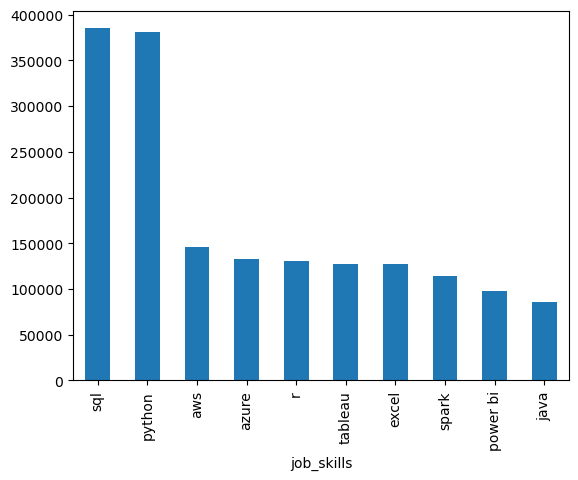

In [12]:
df_exploded_copy['job_skills'].value_counts().head(10).plot(kind = 'bar') ;

In [13]:
top10_skills = df_exploded_copy['job_skills'].value_counts().head(10)

top10_skills

job_skills
sql         384822
python      380883
aws         145377
azure       132525
r           130884
tableau     127207
excel       127011
spark       114604
power bi     98141
java         85607
Name: count, dtype: int64

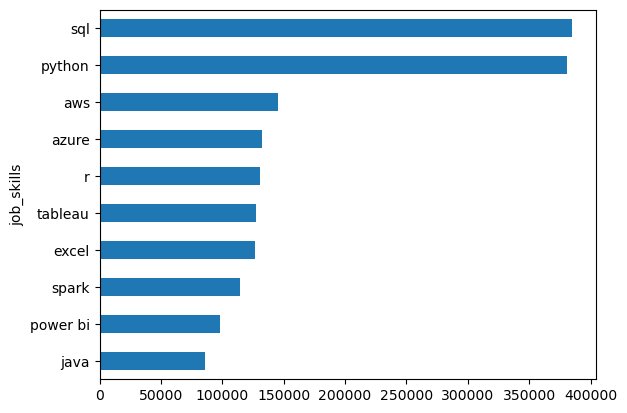

In [14]:
top10_skills.sort_values(ascending = True).plot(kind = 'barh') ;

In [15]:
skills_count = df_exploded_copy.groupby(['job_title_short', 'job_skills']).size()

skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           228
Length: 2256, dtype: int64

In [16]:
df_skills_count = skills_count.reset_index(name = 'skill_count')

df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [17]:
type(df_skills_count)

pandas.core.frame.DataFrame

In [18]:
df_skills_count = df_skills_count.sort_values(by = 'skill_count', ascending = False)

In [19]:
job_title = 'Data Analyst'

top = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top)

In [20]:
df_skill_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92422
494,Data Analyst,excel,66858
590,Data Analyst,python,57186
638,Data Analyst,tableau,46453
583,Data Analyst,power bi,39378
594,Data Analyst,r,29995
606,Data Analyst,sas,13998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


In [21]:
type(df_skill_final)

pandas.core.frame.DataFrame

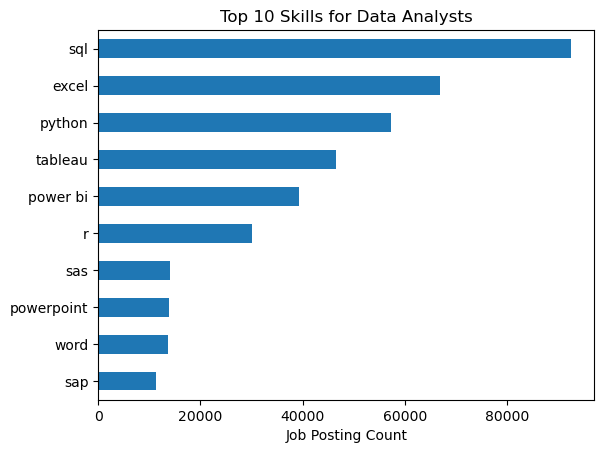

In [22]:
df_skill_final.plot(kind = 'barh' , x = 'job_skills', y = 'skill_count') 
plt.gca().invert_yaxis()
plt.title(f'Top {top} Skills for {job_title}s')
plt.legend().set_visible(False)
plt.ylabel('') 
plt.xlabel('Job Posting Count');

In [23]:
df_skill_final_sorted = df_skill_final.sort_values(by = 'skill_count', ascending = True)

df_skill_final_sorted

,job_title_short,job_skills,skill_count
605,Data Analyst,sap,11280
664,Data Analyst,word,13562
585,Data Analyst,powerpoint,13822
606,Data Analyst,sas,13998
594,Data Analyst,r,29995
583,Data Analyst,power bi,39378
638,Data Analyst,tableau,46453
590,Data Analyst,python,57186
494,Data Analyst,excel,66858
625,Data Analyst,sql,92422


<Axes: ylabel='job_skills'>

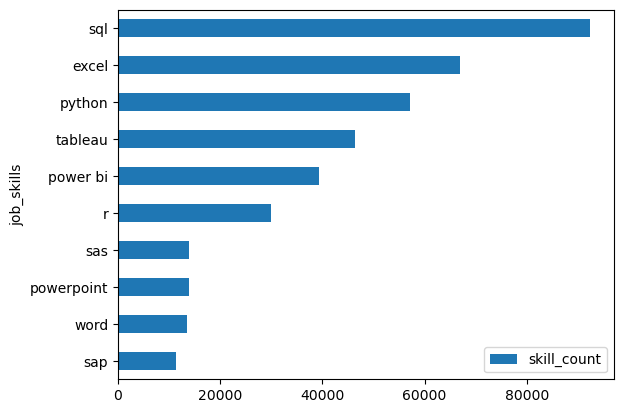

In [24]:
df_skill_final_sorted.plot(kind = 'barh', x = 'job_skills', y = 'skill_count') 
